In [4]:
import yfinance

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [6]:
import yfinance as yf
from datetime import date, timedelta

In [7]:
today = date.today()
today

datetime.date(2023, 3, 3)

In [8]:
end_date = today.strftime("%Y-%m-%d")
end_date

'2023-03-03'

In [9]:
d1 = date.today() - timedelta(days=360*5) #for last 5 years
d1

datetime.date(2018, 3, 29)

In [10]:
start_date = d1.strftime("%Y-%m-%d")
start_date

'2018-03-29'

In [11]:
#Call API
data = yf.download(tickers = "GOOGL",
                  start = start_date,
                  end = end_date)
data.shape

[*********************100%***********************]  1 of 1 completed


(1240, 6)

In [12]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-29 00:00:00-04:00,50.560501,52.402500,50.202000,51.856998,51.856998,69338000
2018-04-02 00:00:00-04:00,51.381001,51.976501,49.712502,50.631500,50.631500,65068000
2018-04-03 00:00:00-04:00,50.807499,51.250000,49.862499,50.933998,50.933998,51322000
2018-04-04 00:00:00-04:00,49.911499,51.637001,49.825500,51.485500,51.485500,50724000
2018-04-05 00:00:00-04:00,52.319500,52.335499,51.200001,51.632000,51.632000,35836000


In [13]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-29 00:00:00-04:00,50.560501,52.402500,50.202000,51.856998,51.856998,69338000
1,2018-04-02 00:00:00-04:00,51.381001,51.976501,49.712502,50.631500,50.631500,65068000
2,2018-04-03 00:00:00-04:00,50.807499,51.250000,49.862499,50.933998,50.933998,51322000
3,2018-04-04 00:00:00-04:00,49.911499,51.637001,49.825500,51.485500,51.485500,50724000
4,2018-04-05 00:00:00-04:00,52.319500,52.335499,51.200001,51.632000,51.632000,35836000
...,...,...,...,...,...,...,...
1235,2023-02-24 00:00:00-05:00,89.440002,89.889999,88.580002,89.129997,89.129997,36585100
1236,2023-02-27 00:00:00-05:00,89.870003,90.160004,89.339996,89.870003,89.870003,27502300
1237,2023-02-28 00:00:00-05:00,89.330002,91.230003,89.320000,90.059998,90.059998,30142000
1238,2023-03-01 00:00:00-05:00,89.980003,91.029999,89.669998,90.360001,90.360001,31111200


<AxesSubplot:xlabel='Date', ylabel='High'>

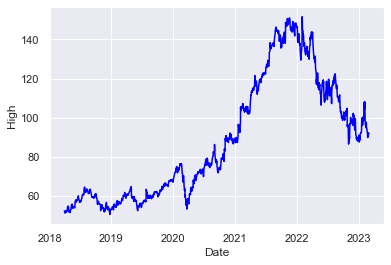

In [14]:
sns.lineplot(data=data,
            x='Date',
            y='High',
            color='blue')

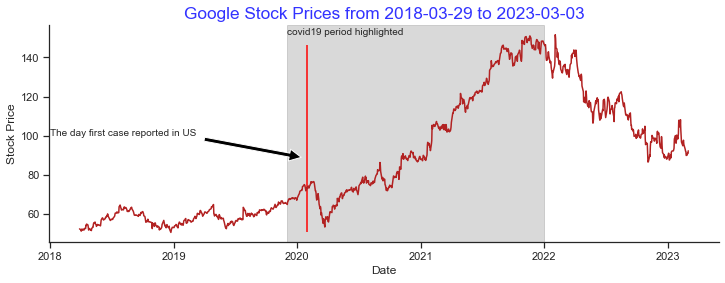

In [15]:
plt.figure(figsize=(12,4))
sns.set_style('ticks')
sns.lineplot(data=data,
            x='Date',
            y='High',
            color='firebrick')

## First covid reported on December'19 in Wuhan
plt.axvspan(xmin=pd.to_datetime('2019-12-1'),
           xmax= pd.to_datetime('2022'),
           color="dimgray",
           alpha=0.25)
plt.text(x=pd.to_datetime('2019-12-1'),
        y=data["High"].max(),
        size='small',
        s= "covid19 period highlighted")

##First covid case in US on 30 Jan'20
plt.vlines(x=pd.to_datetime('2020-01-30'),
          color='red',
          ymin=data['High'].min(),
          ymax=data['High'].max()-5)
plt.annotate(text='The day first case reported in US',
            xy=(pd.to_datetime('2020-1-30'),
               data['High'].mean()),
            xytext=(pd.to_datetime('2018-1-1'),100),
            size='small',
            arrowprops=dict(facecolor='black',shrink=0.05))
plt.title("Google Stock Prices from {0} to {1}".format(start_date,end_date),
         c='blue',
         alpha=0.8,
         size='x-large');
sns.despine()
plt.ylabel("Stock Price");


In [16]:
import pip


pip install --upgrade mplfinance

SyntaxError: invalid syntax (Temp/ipykernel_400/2139929949.py, line 4)

In [17]:
import mplfinance

In [ ]:
#to plot candlestick chart
new_data = data.set_index(keys='Date')
new_data

In [18]:
mplfinance.plot(new_data.loc[pd.to_datetime('2020-2-15'):pd.to_datetime('2020-6-15'), :],
               type='candle',
               style='charles',
               title="Candlestick Chart of Google Stocks from 15Jan'20 to 15June'20",
               ylabel='Price($)')

NameError: name 'new_data' is not defined

In [ ]:
print("Timezone-naive datetime object/timestamp: ",end="")
pd.to_datetime("2020-1-1")

In [ ]:
print("/Timezone-aware datetime object/timestamp: ",end="")
pd.to_datetime("2020-1-1").tz_localize(tz='Asia/Kolkata')

In [ ]:
mplfinance.plot(new_data.loc[pd.to_datetime("2020-2-15").tz_localize(tz='Asia/Kolkata'):
                            pd.to_datetime("2020-6-15").tz_localize(tz='Asia/Kolkata'), :],
               type='candle',
               style='charles',
               title="Candlestick Chart of Google Stocks from 15Jan'20 to 15June'20",
               ylabel='Price($)')